# Ficheros de datos de NEXT

En este notebook se explica tanto la estructura de carpetas de datos como el contenido de cada archivo.

En la carpeta compartida `data` vas a encontrar la siguiente estructura:

<p style="text-align: center;"> <code>data/pressure/event_type/data_type</code> </p>

Dónde:

+ `pressure`   - La presión en el detector a la que están simulados los datos. Encontrarás las carpetas: `1bar`, `2bar`, `5bar`, `13bar`, que se corresponden con valores de 1, 2, 5, 13.5 bar respectivamente.
- `event_type` - Tipo de datos simulados. Encontrarás las carpetas: `0nubb` para datos de doble beta sin neutrinos $0\nu\beta\beta$, y `1eroi` para electrones generados en la ROI (Region Of Interest, que en este caso es la región alrededor del $Q_{\beta\beta}$)
+ `data_type`  - Tipo de ficheros. Encontrarás las carpetas: `nexus` para los datos de Monte Carlo tal y como salen del código de simulación de NEXT (nexus es el nombre de ese código), y `label` para esos mismos datos etiquetados (más adelante explico un poco más qué hay en cada uno). Los nombres de los ficheros son `nexus_N_event_type.h5` y `nexus_label_N_event_type.h5`, respectivamente.

##### Por ahora sólo voy a compartir 5 ficheros a 5 y 13.5 bares de electrones en la ROI para este ejercicio, tanto nexus como etiquetados (20 ficheros en total). Cuando tengas acceso al CESGA podrás ver todos y la jerarquía de carpetas en principio será la misma.

In [2]:
import glob

import numpy  as np
import tables as tb
import pandas as pd

import matplotlib.pyplot as plt 

En la siguiente celda tienes la variable `basedir`, que debes cambiar según dónde pongas la carpeta compartida, y luego `datadir` añade el resto del path hacia los datos. Te recomiendo que las carpetas no tengan espacios, si tienes que separar algo que sea con _ (en mi caso está con espacios porque la carpeta de One Drive que te comparto me obliga a que sea así, pero tu cuando la descargues procura evitarlo)

En la siguiente celda, usando `glob` en un path con asteriscos, en cada asterisco va a coger todas las posibilidades que encuentre. Como en la carpeta solo hay los datos que te dije, usar glob sobre `datadir` es especificar que mire en todas las presiones (primer *), en todos los tipos de eventos (segundo *), en todos los tipos de datos (tercer *) y coger todos los ficheros que acaben en .h5 (cuarto *). Por eso, la variable files va a tener 20 strings con el path a cada uno de los 20 archivos que te compartí.

In [3]:
basedir = '/Users/mperez/OneDrive - Universidade de Santiago de Compostela/'
datadir = basedir + 'TFG_Xan_Insua/data/*/*/*/*.h5'
files = glob.glob(datadir)

Vamos a coger por separado los archivos de nexus y etiquetados para que veas como se puede usar lo de `glob`:

In [4]:
nexusdir = basedir + 'TFG_Xan_Insua/data/*/*/nexus/*.h5'
labeldir = basedir + 'TFG_Xan_Insua/data/*/*/label/*.h5'

nexusfiles = glob.glob(nexusdir)
labelfiles = glob.glob(labeldir)

O por ejemplo, si queremos tener los ficheros nexus y los etiquetados, pero separados por presiones, podemos hacer un diccionario:

In [5]:
pressures = ['1bar', '2bar', '5bar', '13bar']

nexusfiles_p = {}
labelfiles_p = {}

for p in pressures:
    nexusdir_p = basedir + 'TFG_Xan_Insua/data/{}/*/nexus/*.h5'.format(p)
    labeldir_p = basedir + 'TFG_Xan_Insua/data/{}/*/label/*.h5'.format(p)

    nexusfiles_p[p] = glob.glob(nexusdir_p)
    labelfiles_p[p] = glob.glob(labeldir_p)

## NEXUS

### Vamos a ver cómo son los ficheros de nexus. Los ficheros que usamos están en formato .h5, que es un formato jerárquico con distintas tablas guardadas en distintos huecos, como si fuera un directorio de tablas. Para ver el contenido de los ficheros .h5, podemos usar `tb.open_file()` de la siguiente forma:

In [6]:
press = '13bar'
nfile = 0


nexusfile = nexusfiles_p[press][nfile]
print('Estamos viendo el contenido del fichero {}'.format(nexusfile))

with tb.open_file(nexusfile, 'r') as h5in:
    print(h5in)


Estamos viendo el contenido del fichero /Users/mperez/OneDrive - Universidade de Santiago de Compostela/TFG_Xan_Insua/data/13bar/1eroi/nexus/nexus_4_1eroi.h5
/Users/mperez/OneDrive - Universidade de Santiago de Compostela/TFG_Xan_Insua/data/13bar/1eroi/nexus/nexus_4_1eroi.h5 (File) ''
Last modif.: 'Thu Feb 15 11:12:47 2024'
Object Tree: 
/ (RootGroup) ''
/MC (Group) ''
/MC/configuration (Table(33,)) ''
/MC/hits (Table(17759,)) ''
/MC/particles (Table(1544,)) ''
/MC/sns_positions (Table(0,)) ''
/MC/sns_response (Table(0,)) ''



Vemos que hay un grupo que se llama MC (Monte Carlo) con 4 tablas guardadas con el número de filas que tiene cada una entre paréntesis:

* `configuration` - Recoge información sobre la simulación hecha.
* `hits` - Contiene eventos con las depositiones de energía en el detector, que las llamamos hits.
* `particles`- Contiene información de todas las partículas que se simularon por cada evento, tanto las que depositaron energía en el detector como las que no.
* `sns_positions` y `sns_response` - En este caso no nos interesan, de hecho puedes ver que están vacías.

### Vamos a ir mirando las tablas y qué contienen:

### `configuration`

In [7]:
pd.read_hdf(nexusfile, 'MC/configuration')

,param_key,param_value
0,event_type,background
1,num_events,80
2,saved_events,45
3,interacting_events,80
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
8,/nexus/RegisterGeometry,Next100
9,/nexus/RegisterGenerator,SingleParticleGenerator


Aquí te cuenta un poco de todo, el tipo de evento (background en este caso porque es un electrón), la partícula generada (e-), la región dónde se general la partícula (ACTIVE, que significa todo el gas), la energía máxima y mínima en la que se genera (2.458 MeV, el $Q_{\beta\beta}$), la energía mínima y máxima con la que se guarda (2.3351 MeV - 2.5809 MeV), la presión (13.5 bar), el tipo de gas en el detector (Xenon enriquecido)

Otra cosa que puedes ver es el número de eventos que se simulan (80) y el número de eventos que se guardan (45). Por qué pasa esto? Porque al programa le estamos diciendo "genera unos e- de estas características en el detector, pero guarda sólo los que depositen cierto rango de energía dentro del detector", entonces un evento simulado puede no depositar suficiente energía dentro del detector porque escapa sin ser detectado. De aquí podemos sacar la eficiencia de detectar estos electrones con estas características en este rango.

### `hits`

In [8]:
pd.read_hdf(nexusfile, 'MC/hits')

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,240,-6.150425,-381.358246,895.190857,0.003377,0.009023,ACTIVE,1,0
1,240,-6.644796,-381.033630,894.386841,0.006757,0.006123,ACTIVE,1,1
2,240,-7.037267,-380.434265,893.731750,0.010044,0.006026,ACTIVE,1,2
3,240,-7.317723,-379.721619,893.089905,0.013429,0.043658,ACTIVE,1,3
4,240,-7.449283,-379.050140,892.364014,0.016809,0.004534,ACTIVE,1,4
...,...,...,...,...,...,...,...,...,...
17754,284,-356.964600,-244.805862,540.654663,0.320037,0.000964,ACTIVE,23,11
17755,284,-356.981689,-244.799713,540.620239,0.320461,0.003502,ACTIVE,23,12
17756,284,-356.999207,-244.781662,540.638489,0.320823,0.007730,ACTIVE,23,13
17757,284,-356.982880,-244.782181,540.639587,0.321056,0.002390,ACTIVE,23,14


* `event_id` - Número de evento. Cada evento tiene un número identificativo.
* `x`, `y`, `z`, `time`, `energy` - Posición, tiempo en segundos respecto al inicio del evento y energía de cada hit producido.
* `label` - Puede ser ACTIVE para hits que están en una región del gas que los detectores pueden "observarlo" o BUFFER, donde no. 
* `particle_id` - Número que identifica a cada partícula que depositó hits en cada evento (para poder relacionarlo con la tabla de `particles`)
* `hit_id` - Número que identifica a cada hit de cada partícula de cada evento.

Entonces en por cada `event_id` tenemos una serie de deposiciones con su posición y energía, que cada uno se identifica con una partícula y es único.

### `particles`

In [9]:
pd.read_hdf(nexusfile, 'MC/particles')

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,240,1,e-,1,0,-5.612262,-381.628113,895.985718,0.000000,40.057629,...,-1.769329,0.657969,-2.233917,-0.0,-0.0,-0.0,2.458000,244.499786,none,eIoni
1,240,5,e-,0,1,32.546062,-330.344574,932.893188,0.600250,31.104595,...,-0.224224,0.296370,-0.147292,-0.0,-0.0,-0.0,0.137790,8.002915,eIoni,eIoni
2,240,4,e-,0,1,54.956577,-324.423615,896.470886,0.415364,55.583412,...,0.410007,-0.126247,0.057573,0.0,0.0,0.0,0.158687,10.298599,eIoni,eIoni
3,240,3,gamma,0,1,47.063946,-330.350800,886.068848,0.360334,98.192467,...,0.085300,-0.081441,0.041811,0.0,-0.0,0.0,0.125127,75.001343,eBrem,phot
4,240,22,e-,0,3,98.192467,-379.166656,911.130493,0.610511,98.192451,...,-0.001419,-0.005731,0.003254,-0.0,0.0,0.0,0.000044,0.000083,phot,msc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,284,42,e-,0,35,-362.781342,-232.823090,534.978210,0.355585,-362.781311,...,0.001752,-0.004478,-0.000032,-0.0,0.0,-0.0,0.000023,0.000021,phot,msc
1540,284,41,e-,0,35,-362.781342,-232.823090,534.978210,0.355585,-362.781311,...,0.002173,-0.007878,0.003666,0.0,0.0,-0.0,0.000079,0.000047,phot,msc
1541,284,40,e-,0,35,-362.781342,-232.823090,534.978210,0.355585,-362.781799,...,-0.008480,-0.033720,0.053194,-0.0,-0.0,0.0,0.003936,0.015207,phot,eIoni
1542,284,34,e-,0,24,-362.776886,-232.813385,534.978699,0.355549,-362.738586,...,0.082038,0.059365,0.126204,0.0,0.0,0.0,0.025007,0.352093,phot,eIoni


Las columnas repetidas son las mismas que para los hits (`event_id`, `particle_id`), luego:
* `particle_name` - Te dice que tipo de partícula es.
* `primary` -  Te dice si es la partícula inicial del evento. Para datos de 1eroi será un electrón, para el doble beta serán 2 electrones.
* `mother_id` - Te dice cuál es la partícula madre de cada partícula. La partícula inicial tiene `mother_id = 0`, y `particle_id = 1`, y las partículas que genera esta tendrán distintos `particle_id` pero todos tendrán `mother_id = 1` al ser creadas por la partícula 1.
* `initial_`, `final_` - Posiciones, tiempo, volumen y momento iniciales y finales de cada partícula. Con volumen se refiere a "lugar" dentro del detector.
* `kin_energy` - Energía de la partícula. No confundas con la energía en los hits, porque esa es solo la depositada. Si sumas toda la energía de todos los hits de una partícula en un evento no tiene por qué coincidir con esta energía, porque no tuvo obligatoriamente que depositar toda su energía en el detector.
* `length` - Distancia que viaja la partícula.
* `creator_proc` y `final_proc` - Procesos físicos por los que se "generan" y se "aniquilan" cada partícula.

### Ejemplo 

Vamos a coger las partículas y los hits de un evento y mirar algunas cosas:

In [10]:
nevent = 251

hits = pd.read_hdf(nexusfile, 'MC/hits')
part = pd.read_hdf(nexusfile, 'MC/particles')

hits_ev = hits[hits.event_id == nevent]
part_ev = part[part.event_id == nevent]


Podemos ver varias características con los hits de las partículas:

In [11]:
print('Numero de hits depositados en este evento: {}'.format(len(hits_ev)))
print('Numero de particulas que depositaron energía en este evento: {}'.format(len(hits_ev.particle_id.unique())))

Numero de hits depositados en este evento: 368
Numero de particulas que depositaron energía en este evento: 14


Y más cosas, por ejemplo podemos ver cuántos hits depositó cada partícula, o la energía que depositó cada partícula en total, agrupando por `particle_id` y contando las filas, o sumándolas y escogiendo la columna de energía:

In [12]:
hits_ev.groupby('particle_id').count().energy

particle_id
1     297
2      21
3      12
4       1
5      12
6      14
7       1
8       2
9       2
10      2
11      1
12      1
13      1
14      1
Name: energy, dtype: int64

In [13]:
hits_ev.groupby('particle_id').sum().energy

particle_id
1     2.199398
2     0.115229
3     0.051526
4     0.000189
5     0.041018
6     0.041680
7     0.003732
8     0.004048
9     0.000553
10    0.000540
11    0.000023
12    0.000021
13    0.000023
14    0.000021
Name: energy, dtype: float32

Vemos que la partícula con ID = 1 es la que más hits deposita, y la que más energía deposita también. Si miramos en el dataframe de partículas cual es:

In [14]:
part_ev[part_ev.particle_id == 1]

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
448,251,1,e-,1,0,123.781754,237.6091,395.317352,0.0,78.081146,...,0.806396,-2.808596,0.12389,-0.0,0.0,0.0,2.458,277.414703,none,eIoni


Vemos que es el electrón generado con energía 2.458 MeV en la simulación, que depositó 2.1999 MeV directamente en el detector y su proceso final (dónde perdió la energía que le quedaba) fue una ionización del gas. 

El resto de partículas que generó siguieron interactuando por el detector y depositando su propia energía. Si sumamos la energía de todos los hits:

In [15]:
hits_ev.groupby('particle_id').sum().energy.sum()

2.4580002

Obtenemos otra vez el $Q_{\beta\beta}$, lo que quiere decir es que todas las partículas que se generaron en este evento en concreto depositaron toda la energía, y nada escapó del detector.

## ETIQUETADO

##### El proceso de etiquetado sirve para hacer segmentación semántica con redes neuronales, y en el caso de nuestros datos, sirve también para obtener algunas características relacionadas con la topología de la traza. El proceso a grandes rasgos es utilizar la información de `particles` de nexus para saber cuál es la partícula que nos interesa y qué hits deposita, para poder etiquetarlos como `track` y `blob`, y todos los demás hits como `other`. Luego el espacio se voxeliza y se etiquetan los voxeles. Más explicado está en mi TFM y en la presentación, en la carpeta `resources`.

Vamos a ver ahora cómo son los ficheros de etiquetado:

In [16]:
press = '13bar'
nfile = 0


labelfile = labelfiles_p[press][nfile]
print('Estamos viendo el contenido del fichero {}'.format(labelfile))

with tb.open_file(labelfile, 'r') as h5in:
    print(h5in)


Estamos viendo el contenido del fichero /Users/mperez/OneDrive - Universidade de Santiago de Compostela/TFG_Xan_Insua/data/13bar/1eroi/label/nexus_label_2_1eroi.h5
/Users/mperez/OneDrive - Universidade de Santiago de Compostela/TFG_Xan_Insua/data/13bar/1eroi/label/nexus_label_2_1eroi.h5 (File) ''
Last modif.: 'Thu Feb 15 11:13:22 2024'
Object Tree: 
/ (RootGroup) ''
/DATASET (Group) ''
/DATASET/BeershebaVoxels (Table(0,)) ''
/DATASET/BinsInfo (Table(1,)) ''
/DATASET/EventsInfo (Table(53,)) ''
/DATASET/IsauraMCInfo (Table(99,)) ''
/DATASET/MCHits (Table(20212,)) ''
/DATASET/MCVoxels (Table(8005,)) ''



Vemos que hay un grupo que se llama DATASET con 6 tablas guardadas:

* `BeershebaVoxels` - Ignora esto, está vacía.
* `BinsInfo` - Recoge información sobre la voxelización.
* `EventsInfo` - Un mapeo entre el fichero de nexus y este fichero, evento a evento (te dice por ejemplo que el evento con `event_id = 80` en el fichero `nexus_2_1eroi.h5` se corresponde con el evento etiquetado con `dataset_id = 0` del archivo `nexus_label_2_1eroi.h5`)
* `IsauraMCInfo` - Contiene información de las trazas hecha con un algoritmo que usa NEXT para buscar los extremos de la traza, ser capaces de cuantificar los blobs... Es decir, otro approach distinto al de redes neuronales. En principio no vas a trabajar mucho con esto, pero siempre está bien tener para poder comparar y ver qué sucede en casos concretos. Si quisieras entender como funciona puedes preguntarme, o echar un vistazo al apartado "Blob candidate definition" del paper que está en `resources/isaura_paper.pdf`.
* `MCHits`- Son los hits de Monte Carlo etiquetados (iguales a los de nexus pero con una columna a mayores de etiqueta)
* `MCVoxels` - Son los voxeles etiquetados de cada evento, y contienen más información.

### `BinsInfo`

In [17]:
pd.read_hdf(labelfile, 'DATASET/BinsInfo')

,min_x,total_x,size_x,max_x,nbins_x,min_y,total_y,size_y,max_y,nbins_y,...,total_z,size_z,max_z,nbins_z,Rmax,loss_th,ener_th,sb_th,max_dis,fix_conn
0,-500.0,1000.0,2.0,500.0,501.0,-500.0,1000.0,2.0,500.0,501.0,...,1300.0,2.0,1300.0,651.0,500.0,0.25,NaN,1.5,1.732051,none


Te da las posiciones minimas y máximas del "grid" que hacemos al voxelizar, de -500 mm a +500mm en x e y, y de 0 a 1300mm en z. También te dice el tamaño que tienen en todas las dimensiones, en este caso son 2x2x2mm. Luego hay más información que en principio no interesa.

In [18]:
pd.read_hdf(labelfile, 'DATASET/EventsInfo').head(2)

,event_id,binclass,dataset_id,pathname,basename,label_pathname,label_basename
0,80,0,0,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,nexus_2_1eroi.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,nexus_label_2_1eroi.h5
1,81,0,1,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,nexus_2_1eroi.h5,/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT...,nexus_label_2_1eroi.h5


### `IsauraMCInfo`

Básicamente lo que dije antes + que te dice la "binclass", o clase binaria que le llamé, que es simplemente 0 para eventos de background y 1 para eventos de señal. En estos pocos datos que te pasé son todos de 1eroi entonces son todos 0.

In [19]:
pd.read_hdf(labelfile, 'DATASET/IsauraMCInfo')

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,80,0,2.458000,223.730185,149,395,1,-277.197021,45.612591,943.576111,...,944.254393,-233.023643,46.662304,1020.985377,0.557720,0.277908,0,1.963800,1.978583,1.964021
1,81,0,2.458000,172.941768,146,335,1,-269.374390,130.906097,525.267822,...,529.419636,-269.374390,172.353378,612.379700,0.633232,0.181537,0,1.973697,1.948772,1.989190
2,82,0,2.458000,272.822387,171,362,1,61.903206,-14.916119,659.642700,...,705.629039,160.389873,47.180214,726.718406,0.543256,0.128529,0,1.985103,1.963581,1.984472
3,83,0,2.345459,153.048051,119,363,3,-259.696655,306.440094,458.543701,...,459.401646,-259.696655,379.666718,532.137268,0.522701,0.211310,0,1.981698,1.979098,1.994810
4,83,1,0.078974,1.979098,2,21,3,-246.455032,357.771942,440.376007,...,440.487096,-246.168518,357.938337,440.414433,0.078974,0.078974,-21,1.981698,1.979098,1.994810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,130,1,0.029781,0.000000,1,29,2,89.804962,-287.351196,481.537262,...,481.545568,89.818405,-287.304742,481.545568,0.029781,0.029781,-29,1.935596,1.926267,1.954346
95,131,0,2.413160,132.349262,143,347,3,-234.368744,375.773468,374.680969,...,374.734779,-209.540668,395.006420,403.419440,0.323590,0.310656,0,1.991653,1.969092,1.975363
96,131,1,0.029781,0.000000,1,8,3,-229.986847,387.610931,420.023926,...,420.033509,-229.976054,387.627966,420.033509,0.029781,0.029781,-8,1.991653,1.969092,1.975363
97,131,2,0.015059,0.000000,1,25,3,-220.994888,387.552063,408.492371,...,408.495402,-220.989067,387.561291,408.495402,0.015059,0.015059,-25,1.991653,1.969092,1.975363


Cada fila de este dataframe va a ser una traza. Está construida también haciendo una voxelización de los hits, y buscando ciertas características que se resumen en dicha línea. Hay eventos que pueden tener más de una traza, simplemente por el hecho de que alguna partícula que generó el electrón primario deposite también energía en el detector en otro punto. Puedes ver la energía por traza, longitud, el número de voxeles que ocupa (~2x2x2mm, ya que con este algoritmo se ajusta algo la voxelización, no es fija), el número de hits que tiene, las dimensiones, lo que el algoritmo piensa que son extremos, etc... Es un algoritmo que trabaja sobre los hits pero no utiliza información de la tabla de partículas, simplemente intenta adivinar lo mejor porsible cuales son los extremos y cuantificar su energía para ver si son candidatos a blob o no.

### `MCHits`

In [20]:
pd.read_hdf(labelfile, 'DATASET/MCHits')

,x,y,z,hit_id,particle_id,energy,segclass,binclass,dist_hits,cumdist,particle_name,creator_proc,group_ener,small_b,dataset_id
0,-233.145340,45.612591,1020.738037,0,1,0.002865,2.0,0,0.000000,0.000000,e-,none,1.454317,False,0
1,-233.038086,46.570595,1020.999146,1,1,0.007287,2.0,0,0.998725,0.998725,e-,none,1.454317,False,0
2,-232.914001,47.550194,1021.132324,2,1,0.004140,2.0,0,0.996367,1.995093,e-,none,1.454317,False,0
3,-232.846039,48.543678,1021.205261,3,1,0.004040,2.0,0,0.998474,2.993567,e-,none,1.454317,False,0
4,-232.742172,49.527382,1021.308167,4,1,0.004960,2.0,0,0.994510,3.988077,e-,none,1.454317,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20207,-55.946938,-331.242401,932.869263,9,6,0.001811,1.0,0,0.000000,0.000000,e-,eIoni,0.053237,False,52
20208,-55.955242,-331.246033,932.867493,10,6,0.002206,1.0,0,0.000000,0.000000,e-,eIoni,0.053237,False,52
20209,-55.952045,-331.242584,932.871765,11,6,0.003132,1.0,0,0.000000,0.000000,e-,eIoni,0.053237,False,52
20210,-55.953232,-331.240845,932.869751,12,6,0.001595,1.0,0,0.000000,0.000000,e-,eIoni,0.053237,False,52


Son los mismos hits que de  nexus, pero con la columna `segclass` para cada hit, con:
* **other**: 1
* **track**: 2
* **blob** : 3

También está la `binclass` para todo el evento, la distancia entre hits consecutivos y la distancia acumulada por partícula, el tipo de partícula, el proceso de creación... Son cosas que vienen un poco de añadir el etiquetado y algo de la informacion que viene en el dataframe de `particles`.

### `MCVoxels`

In [21]:
pd.read_hdf(labelfile, 'DATASET/MCVoxels')

,x,y,z,ener,ratio,segclass,nhits,binclass,dataset_id,elem_ener,elem,elem_count,cloud_ener,cloud,cloud_count,nblob,blob_success
0,111,283,505,0.007228,1.0,2,2,0,0,1.019243,2_0,2.0,2.458,c_0,1.0,1,True
1,111,283,506,0.013867,1.0,2,2,0,0,1.019243,2_0,2.0,2.458,c_0,1.0,1,True
2,111,284,504,0.010535,1.0,2,3,0,0,1.019243,2_0,2.0,2.458,c_0,1.0,1,True
3,111,285,503,0.004497,1.0,2,1,0,0,1.019243,2_0,2.0,2.458,c_0,1.0,1,True
4,112,283,506,0.006496,1.0,2,1,0,0,1.019243,2_0,2.0,2.458,c_0,1.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,224,80,464,0.003969,1.0,3,1,0,52,0.519676,3_0,1.0,2.458,c_0,1.0,1,True
8001,224,81,465,0.012234,1.0,2,2,0,52,0.336884,2_1,4.0,2.458,c_0,1.0,1,True
8002,225,80,464,0.019075,1.0,3,2,0,52,0.519676,3_0,1.0,2.458,c_0,1.0,1,True
8003,225,80,465,0.006121,1.0,2,1,0,52,0.336884,2_1,4.0,2.458,c_0,1.0,1,True


Finalmente, el dataframe con los voxeles etiquetados. Los voxeles son la posición en el grid que comenté antes. Es decir, en el eje X teníamos una voxelización de -500 a +500, en tamaño 2mm, es decir, dividimos el espacio en X (sacando la info guardada de `BinsInfo`) como:

In [22]:
bins_info = pd.read_hdf(labelfile, 'DATASET/BinsInfo')

min_x, max_x, size_x = bins_info.min_x.values, bins_info.max_x.values, bins_info.size_x.values,

xbins = np.arange(min_x, max_x + size_x, size_x)
print(xbins)

[-500. -498. -496. -494. -492. -490. -488. -486. -484. -482. -480. -478.
 -476. -474. -472. -470. -468. -466. -464. -462. -460. -458. -456. -454.
 -452. -450. -448. -446. -444. -442. -440. -438. -436. -434. -432. -430.
 -428. -426. -424. -422. -420. -418. -416. -414. -412. -410. -408. -406.
 -404. -402. -400. -398. -396. -394. -392. -390. -388. -386. -384. -382.
 -380. -378. -376. -374. -372. -370. -368. -366. -364. -362. -360. -358.
 -356. -354. -352. -350. -348. -346. -344. -342. -340. -338. -336. -334.
 -332. -330. -328. -326. -324. -322. -320. -318. -316. -314. -312. -310.
 -308. -306. -304. -302. -300. -298. -296. -294. -292. -290. -288. -286.
 -284. -282. -280. -278. -276. -274. -272. -270. -268. -266. -264. -262.
 -260. -258. -256. -254. -252. -250. -248. -246. -244. -242. -240. -238.
 -236. -234. -232. -230. -228. -226. -224. -222. -220. -218. -216. -214.
 -212. -210. -208. -206. -204. -202. -200. -198. -196. -194. -192. -190.
 -188. -186. -184. -182. -180. -178. -176. -174. -1

Y el voxel que aparece en el evento sería, por ejemplo, para el primero que vemos al abrir el dataframe (que pone 111 en X):

In [23]:
[xbins[111], xbins[111 + 1]]

[-278.0, -276.0]

Es decir, el primer voxel del primer evento de este fichero, ocupa en X desde -278 a -276mm. Igualmente en el resto de dimensiones:

In [24]:
def voxel_position(bins_info, coord, voxel):
    min_, max_, size_ = bins_info['min_' + coord].values, bins_info['max_' + coord].values, bins_info['size_' + coord].values
    bins = np.arange(min_, max_ + size_ , size_ )
    return [bins[voxel], bins[voxel + 1]]

print('El voxel es un cubo que ocupa:')
print('x = ', voxel_position(bins_info, 'x', 111))
print('y = ', voxel_position(bins_info, 'y', 283))
print('z = ', voxel_position(bins_info, 'z', 505))

El voxel es un cubo que ocupa:
x =  [-278.0, -276.0]
y =  [66.0, 68.0]
z =  [1010.0, 1012.0]





A parte de la posición de voxel, su energía y el número de hits que contiene, tenemos un segundo etiquetado, que le llamo etiquetado de "elementos" y etiquetado de "clouds". Para entender a que me refiero, creo que está bien un ejemplo visual que tengo en la presentación de `resources/labelling_presentation.pdf` en las diapositivas 37-38. 

El etiquetado de cloud agrupa voxeles que están juntos y los va etiquetando como c_0, c_1, etc... En la tabla ves que tenemos esa etiqueta, la energía de ese conjunto de voxeles y el numero de clouds por evento. Estas clouds son lo mismo que las trazas de isaura, por lo que para un evento, el número cloud_count debería ser el mismo que para isaura numb_of_tracks (aunque no siempre porque la voxelización no es exactamente igual)

El etiquetado de elements agrupa los voxeles que están juntos Y ADEMÁS que tienen la misma clase de segmentacion, y va etiquetándolos pues para la traza como 2_0, 2_1..., o para blob 3_0, 3_1... siendo el primer número el mismo que segclass. Esto como puedes comprobar nos sirve para, por ejemplo, saber cuántos blobs tenemos. En principio como nosotros le dimos etiquetas a los hits y luego a los voxeles, deberíamos tener el número de blobs correcto, entonces esta herramienta sirve más para después de pasar el objeto por la red, y que la red decida qué etiqueta darle a cada voxel. Otra cosa que podemos ver es si la traza es continua, o si tiene algún artefacto que la interrumpe, o si la traza se tuerce de alguna forma extraña, etc...

## EJERCICIO

Te propongo que hagas un par de cosas con los archivos que tienes.

1. Haz un histograma con algunas características de los hits por cada presión.
    + Para eso, tienes que hacer un bucle en el que abras cada archivo y guardes cierta información (por ejemplo en una lista), para después hacer un plot.
    + Hazlo para el número de hits por evento, y la energía por evento.

2. Puedes hacer lo mismo pero usando la información de los ficheros etiquetados, y mirar el número de hits por evento y por tipo de segclass, y hacerlo también con la energía.

3. Haz un plot en 3D de los hits de un evento que quieras. Puedes hacer un scatter normal (sólo ploteas los puntos), pero también quiero que hagas que cada punto tenga un color basado en una característica que tenga, como la energía de cada hit, o su clase de segmentación `segclass` (con los ficheros etiquetados). Lo más fácil para esto es que uses una colorbar (sobre todo para energías; para segmentación, como son 3 números solo, lo puedes hacer con una leyenda normal).

4. Haz un plot en 3D de los voxeles del mismo evento que antes, para así ver cómo queda voxelizado. Una vez más, los voxeles los puedes plottear con distintos colores según la clase de segmentación que se le asignó, la energía del voxel, y esta vez puedes poner también el número de hits por voxel en colores en el plot.

### Con los puntos 1 y 2 podrás manejar los dataframes de una forma que te va a ser útil. Los puntos 3 y 4 sobre plotear tienes bastante información si buscas en internet para que queden bien. De todas formas, si te atascas en cualquiera de los dos casos avísame y miramos, la idea no es que te pases horas intentando hacer algo de esto sin que te salga, si no aprender a hacerlo para luego usarlo fácil. O si te abruma mirarlo solo ven o hacemos videollamada y le echamos un vistazo.

##### Algun ejemplo más

En la siguiente celda te enseño por ejemplo a sacar la energía por evento de un archivo en un array. Coge el archivo, agrupa por `event_id`, suma, escoge la columna de energía y luego coge los valores y los pone en un array. Eso lo tienes que hacer para los 5 archivos, diferenciandolos por presión y compáramelos en el mismo plot. Lo mismo con el número de hits.

In [25]:
pd.read_hdf(nexusfile, 'MC/hits').groupby('event_id').sum().energy.values

array([2.458    , 2.458    , 2.458    , 2.458    , 2.458    , 2.458    ,
       2.458    , 2.458    , 2.458    , 2.458    , 2.458    , 2.458    ,
       2.458    , 2.458    , 2.458    , 2.3760393, 2.458    , 2.458    ,
       2.458    , 2.458    , 2.458    , 2.458    , 2.458    , 2.458    ,
       2.458    , 2.458    , 2.458    , 2.458    , 2.458    , 2.458    ,
       2.458    , 2.458    , 2.458    , 2.458    , 2.458    , 2.458    ,
       2.458    , 2.458    , 2.458    , 2.458    , 2.458    , 2.458    ,
       2.458    , 2.458    , 2.458    ], dtype=float32)

En la siguiente hago lo mismo, pero con el número de hits. Date cuenta de que da igual qué columna selecciones para sacar los valores a posteriori (x, y, z, label, etc...), ya que `count()` lo que hace es contar por cada agrupación cuantas filas hay:

In [26]:
pd.read_hdf(nexusfile, 'MC/hits').groupby('event_id').count().energy.values

array([392, 371, 365, 456, 350, 450, 477, 476, 471, 454, 369, 368, 350,
       387, 442, 341, 367, 356, 397, 397, 437, 322, 387, 366, 387, 349,
       433, 393, 360, 399, 455, 357, 455, 344, 403, 375, 392, 367, 394,
       379, 347, 398, 473, 350, 401])

Otras formas de recorrer los eventos de un fichero en pandas por si necesitas hacer cosas más complicadas que requieran algo más que un `.count()` o un `.sum()`:

* Podemos hacer un bucle en el `event_id` e ir seleccionando de cada vez los hits con ese ID:

In [27]:
hits = pd.read_hdf(nexusfile, 'MC/hits')
for i in hits.event_id.unique():
    event = hits[hits.event_id == i]
    print(i, event.sum().energy)

240 2.4580000016439953
241 2.4580000039459264
242 2.457999999867752
243 2.4579999998868516
244 2.4580000046589703
245 2.457999996516463
246 2.4580000014783536
247 2.4580000019932413
248 2.45799999486826
249 2.4579999997949926
250 2.458000003842244
251 2.457999995798673
252 2.457999999036474
253 2.4579999991510704
254 2.458000000679476
255 2.376039267062879
256 2.4579999963571026
257 2.458000000218817
258 2.4580000056233757
259 2.458000002184235
260 2.4579999994712125
261 2.4580000049900264
262 2.4579999936668173
263 2.4580000042014944
264 2.4580000053447293
265 2.4580000014902907
266 2.458000001153323
267 2.458000001669461
268 2.458000005222857
269 2.458000001410255
270 2.4580000014057077
271 2.45799999701876
272 2.4580000013957033
273 2.4580000049463706
274 2.4579999962552392
275 2.4579999978886917
276 2.4580000043079053
277 2.4579999994493846
278 2.4580000001169537
279 2.4580000063397165
280 2.4579999971475672
281 2.4580000039823062
282 2.4580000054402262
283 2.457999995458522
284 2.

* Podemos usar el `.groupby()` de pandas (que es un iterable):

In [28]:
for i, df in pd.read_hdf(nexusfile, 'MC/hits').groupby('event_id'):
    print(i, df.sum().energy)

240 2.4580000016439953
241 2.4580000039459264
242 2.457999999867752
243 2.4579999998868516
244 2.4580000046589703
245 2.457999996516463
246 2.4580000014783536
247 2.4580000019932413
248 2.45799999486826
249 2.4579999997949926
250 2.458000003842244
251 2.457999995798673
252 2.457999999036474
253 2.4579999991510704
254 2.458000000679476
255 2.376039267062879
256 2.4579999963571026
257 2.458000000218817
258 2.4580000056233757
259 2.458000002184235
260 2.4579999994712125
261 2.4580000049900264
262 2.4579999936668173
263 2.4580000042014944
264 2.4580000053447293
265 2.4580000014902907
266 2.458000001153323
267 2.458000001669461
268 2.458000005222857
269 2.458000001410255
270 2.4580000014057077
271 2.45799999701876
272 2.4580000013957033
273 2.4580000049463706
274 2.4579999962552392
275 2.4579999978886917
276 2.4580000043079053
277 2.4579999994493846
278 2.4580000001169537
279 2.4580000063397165
280 2.4579999971475672
281 2.4580000039823062
282 2.4580000054402262
283 2.457999995458522
284 2.

Ejemplo de cómo hacer un bucle para ir mirando todos los ficheros a distintas presiones:

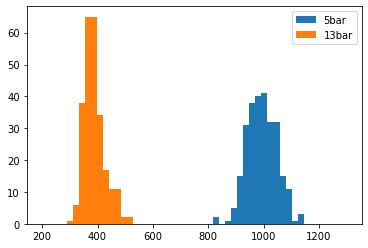

In [29]:
pressures = nexusfiles_p.keys() #['1bar', '2bar', '5bar', '13bar']

E = {}

for p in pressures:
    E[p] = []
    for f in nexusfiles_p[p]:
        hits = pd.read_hdf(f, 'MC/hits')
        energies = list(hits.groupby('event_id').count().energy.values)
        E[p].extend(energies)
    if bool(E[p]):
        plt.hist(E[p], 50, (200, 1300), label = p)
plt.legend()

Ejemplo de cómo hacer lo mismo pero creando un DataFrame:

In [32]:
results = []
for p in labelfiles_p:
    for f in labelfiles_p[p]:
        voxels = pd.read_hdf(f, 'DATASET/MCVoxels')
        for (id, seg), df in voxels.groupby(['dataset_id', 'segclass']): results.append([df.count().ener, df.sum().ener, df.sum().nhits, seg, p])

df = pd.DataFrame(results, columns = ['nvox', 'ener', 'nhits', 'segclass', 'pressure'])

##### Funciones de plot:

Estas funciones toman un evento (no un dataframe entero, solo un evento), el valor que tu quieras (recuerda que tienes en los hits la energía, la segclass... en los voxeles igual). En la de plotear voxeles necesita que le digas el voxel size (es (2, 2, 2), lo puedes ver en bins_info).

In [ ]:
import matplotlib as mpl
from   mpl_toolkits.mplot3d import Axes3D

def plot_3d_hits(event, value, coords = ['x', 'y', 'z'], cmap = mpl.cm.jet):
    xcoord  = event[coords[0]].values
    ycoord  = event[coords[1]].values
    zcoord  = event[coords[2]].values
    content = event[value].values

    fig  = plt.figure(figsize=(8, 8), frameon=False)
    gs   = fig.add_gridspec(12, 12)
    ax   = fig.add_subplot(gs[0:12, 0:10], projection = '3d')
    axcb = fig.add_subplot(gs[1:11, 11])
    norm = mpl.colors.Normalize(vmin=0, vmax=max(content))

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(content))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(xcoord, ycoord, zcoord, c=colors, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')


    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label (value, size = 15)
    cb.ax.tick_params(labelsize=13)
    cb.formatter.set_powerlimits((0, 0))
    plt.show()


def voxel_position(bins_info, coord, voxel):
    min_, max_, size_ = bins_info['min_' + coord].values, bins_info['max_' + coord].values, bins_info['size_' + coord].values
    bins = np.arange(min_, max_ + size_ , size_ )
    return bins[voxel]

def plot_label_creator(min_vals, max_vals, voxel_size, bins_info, affluence, coords, real_position = True):
    '''
    Function to create ticks and its labels to plot an event.

    Args:
        min_vals: TUPLE
    Contains the minimum values for each coordinate of the position of all the voxels in an event.

        max_vals: TUPLE
    Contains the maximum values for each coordinate of the position of all the voxels in an event.

        voxel_size: TUPLE
    Contains the voxel size of the detector for each coordinate. Used to create the labels.

        affluence: TUPLE
    Separation parameter for the labels in each coordinate. If 1, labels will be plotted for each voxel step,
    if 2, they will be plotted each 2 voxel steps, etc.

    RETURNS:
        labels: LIST
    List of arrays (one per coord.) with the labels we want to use (those consistent with the voxel size in
    each coordinate).

        ticks: LIST
    List of arrays (one per coord.) with the ticks that we want to label.
    '''
    labels = []
    ticks  = []
    for mini, maxi, size, aff in zip(min_vals, max_vals, voxel_size, affluence):
        ticks.append(np.arange(0, maxi - mini + 2, aff))

    if real_position:
        min_vals = voxel_position(bins_info, coords[0], min_vals[0]), voxel_position(bins_info, coords[1], min_vals[1]), voxel_position(bins_info, coords[2], min_vals[2])
        max_vals = voxel_position(bins_info, coords[0], max_vals[0]), voxel_position(bins_info, coords[1], max_vals[1]), voxel_position(bins_info, coords[2], max_vals[2])
        #voxel_size = (1, 1, 1)

        for mini, maxi, size, aff in zip(min_vals, max_vals, voxel_size, affluence):
            labels.append(np.arange(mini, (maxi + 2) , size * aff))
    
    if not real_position:
            for mini, maxi, size, aff in zip(min_vals, max_vals, voxel_size, affluence):
                labels.append(np.arange(mini * size, (maxi + 2) * size, size * aff))
    return labels, ticks


def plot_3d_vox(event, voxel_size, value, bins_info, coords = ['x', 'y', 'z'], affluence = (5, 5, 5), real_position = True, th=0, edgecolor='k', linewidth = .3, cmap=mpl.cm.jet, opacity = 1):
    '''
    Function to plot voxels (they have to be normalized)
    Args:
        hits_digitized: DataFrame or list/tuple/array of lists/tuples/arrays in any combination
    Contains the spatial information of the voxels and their content. If we don't use a DataFrame, the input
    must have the structure (x, y, z, content), where content is usually the energy or the segclass. Its shape
    will be (4, N).
        value: STR
    Name of the content column in the DataFrame. Will be also the label of the colorbar.
        coords: LIST
    Name of the coords column in the DataFrame.
        th: FLOAT
    Low threshold of the content of the voxels to plot.
        edgecolor: STR
    Color of the edges of the voxels.
        linewidth: FLOAT
    Width of the edges of the voxels.
        cmap: matplotlib.cm
    Used colormap.
        opacity = FLOAT
    Value from 0 to 1 that indicates the opacity of the voxels.
    '''

    xcoord  = event[coords[0]].values
    ycoord  = event[coords[1]].values
    zcoord  = event[coords[2]].values
    content = event[value].values

    xmin, xmax = min(xcoord), max(xcoord)
    ymin, ymax = min(ycoord), max(ycoord)
    zmin, zmax = min(zcoord), max(zcoord)

    labels, ticks = plot_label_creator((xmin, ymin, zmin), (xmax, ymax, zmax), voxel_size, bins_info, affluence, coords, real_position=real_position)

    nbinsX = int(np.ceil((xmax-xmin))) + 2
    nbinsY = int(np.ceil((ymax-ymin))) + 2
    nbinsZ = int(np.ceil((zmax-zmin))) + 2
    xarr = np.ones(shape=(nbinsX, nbinsY, nbinsZ))*th

    nonzeros = np.vstack([xcoord-xmin+1,
                          ycoord-ymin+1,
                          zcoord-zmin+1])

    nonzeros = nonzeros.astype(int)
    xarr[tuple(nonzeros)] = content
    voxels  = xarr > th

    fig  = plt.figure(figsize=(8, 8), frameon=False)
    gs   = fig.add_gridspec(12, 12)
    ax   = fig.add_subplot(gs[0:12, 0:10], projection = '3d')
    axcb = fig.add_subplot(gs[1:11, 11])
    norm = mpl.colors.Normalize(vmin=xarr.min(), vmax=xarr.max())
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(xarr))
    colors = np.rollaxis(colors, 0, 4)

    ax.voxels(voxels, facecolors=colors * opacity, edgecolor=edgecolor, linewidth = linewidth)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    
    if value == 'energy':
        cb_label = 'Energy (MeV)'    
    else:
        cb_label = value
        
    cb.set_label (cb_label)
    #cb.ax.tick_params(labelsize=13)
    cb.formatter.set_powerlimits((0, 0))

    ax.set_xticklabels(labels[0])
    ax.set_xticks(ticks[0])
    ax.set_yticklabels(labels[1])
    ax.set_yticks(ticks[1])
    ax.set_zticklabels(labels[2])
    ax.set_zticks(ticks[2])

    plt.show()